##### Copyright 2020 The TensorFlow Authors.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image classification with Model Garden

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tfmodels/vision/image_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/models/blob/master/docs/vision/image_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/models/blob/master/docs/vision/image_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/models/docs/vision/image_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial fine-tunes a Residual Network (ResNet) from the TensorFlow [Model Garden](https://github.com/tensorflow/models) package (`tensorflow-models`) to classify images in the [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

Model Garden contains a collection of state-of-the-art vision models, implemented with TensorFlow's high-level APIs. The implementations demonstrate the best practices for modeling, letting users to take full advantage of TensorFlow for their research and product development.

This tutorial uses a [ResNet](https://arxiv.org/pdf/1512.03385.pdf) model, a state-of-the-art image classifier. This tutorial uses the ResNet-18 model, a convolutional neural network with 18 layers.

This tutorial demonstrates how to:
1. Use models from the TensorFlow Models package.
2. Fine-tune a pre-built ResNet for image classification.
3. Export the tuned ResNet model.

## Setup

Install and import the necessary modules.

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [54 lines of output]
      running egg_info
      writing lib3/PyYAML.egg-info/PKG-INFO
      writing dependency_links to lib3/PyYAML.egg-info/dependency_links.txt
      writing top-level names to lib3/PyYAML.egg-info/top_level.txt
      Traceback (most recent call last):
        File "/Users/deven/Developer/Machine_Learning_Algorithms/.venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/Users/deven/Developer/Machine_Learning_Algorithms/.venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/deven/Developer/Machine_Learning_Algorithms/.venv/lib/python3.12/site-package

Import TensorFlow, TensorFlow Datasets, and a few helper libraries.

In [2]:
import pprint
import tempfile

from IPython import display
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

The `tensorflow_models` package contains the ResNet vision model, and the `official.vision.serving` model contains the function to save and export the tuned model.

In [3]:
import os

env = os.environ
for key, value in env.items():
    print(key, value)

SHELL /bin/bash
NV_LIBCUBLAS_VERSION 12.2.5.6-1
NVIDIA_VISIBLE_DEVICES all
COLAB_JUPYTER_TRANSPORT ipc
NV_NVML_DEV_VERSION 12.2.140-1
NV_CUDNN_PACKAGE_NAME libcudnn8
CGROUP_MEMORY_EVENTS /sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events
NV_LIBNCCL_DEV_PACKAGE libnccl-dev=2.19.3-1+cuda12.2
NV_LIBNCCL_DEV_PACKAGE_VERSION 2.19.3-1
VM_GCE_METADATA_HOST 169.254.169.253
HOSTNAME 7c254b1ed74d
LANGUAGE en_US
TBE_RUNTIME_ADDR 172.28.0.1:8011
COLAB_TPU_1VM 
GCE_METADATA_TIMEOUT 3
NVIDIA_REQUIRE_CUDA cuda>=12.2 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=titan,driver>=470,driver<471 brand=titanrtx,driver>=470,driver<471 brand=tesla,driver>=525,driver<526 brand=unknown,driver>=525,driver<526 brand=nvidia,driver>=5

In [4]:
import tensorflow_models as tfm

# These are not in the tfm public API for v2.9. They will be available in v2.10
from official.vision.serving import export_saved_model_lib
import official.core.train_lib

## Configure the ResNet-18 model for the Cifar-10 dataset

The CIFAR10 dataset contains 60,000 color images in mutually exclusive 10 classes, with 6,000 images in each class.

In Model Garden, the collections of parameters that define a model are called *configs*. Model Garden can create a config based on a known set of parameters via a [factory](https://en.wikipedia.org/wiki/Factory_method_pattern).

Use the `resnet_imagenet` factory configuration, as defined by `tfm.vision.configs.image_classification.image_classification_imagenet`. The configuration is set up to train ResNet to converge on [ImageNet](https://www.image-net.org/).

TypeError: 'DatasetInfo' object is not subscriptable

In [5]:
exp_config = tfm.core.exp_factory.get_exp_config("resnet_imagenet")
tfds_name = "cifar10"
ds, ds_info = tfds.load(tfds_name, with_info=True)
ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteR8CPP8/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteR8CPP8/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_dir=PosixGPath('/tmp/tmp58211ixttfds'),
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning mult

Adjust the model and dataset configurations so that it works with Cifar-10 (`cifar10`).

In [6]:
# Configure model
exp_config.task.model.num_classes = 10
exp_config.task.model.input_size = list(ds_info.features["image"].shape)
exp_config.task.model.backbone.resnet.model_id = 18

# Configure training and testing data
batch_size = 128

exp_config.task.train_data.input_path = ""
exp_config.task.train_data.tfds_name = tfds_name
exp_config.task.train_data.tfds_split = "train"
exp_config.task.train_data.global_batch_size = batch_size

exp_config.task.validation_data.input_path = ""
exp_config.task.validation_data.tfds_name = tfds_name
exp_config.task.validation_data.tfds_split = "test"
exp_config.task.validation_data.global_batch_size = batch_size

Adjust the trainer configuration.

In [8]:
logical_device_names = [
    logical_device.name for logical_device in tf.config.list_logical_devices()
]

if "GPU" in "".join(logical_device_names):
    print("This may be broken in Colab.")
    device = "GPU"
elif "TPU" in "".join(logical_device_names):
    print("This may be broken in Colab.")
    device = "TPU"
else:
    print("Running on CPU is slow, so only train for a few steps.")
    device = "CPU"

if device == "CPU":
    train_steps = 20
    exp_config.trainer.steps_per_loop = 5
else:
    train_steps = 5000
    exp_config.trainer.steps_per_loop = 100

exp_config.trainer.summary_interval = 100
exp_config.trainer.checkpoint_interval = train_steps
exp_config.trainer.validation_interval = 1000
exp_config.trainer.validation_steps = ds_info.splits["test"].num_examples // batch_size
exp_config.trainer.train_steps = train_steps
exp_config.trainer.optimizer_config.learning_rate.type = "cosine"
exp_config.trainer.optimizer_config.learning_rate.cosine.decay_steps = train_steps
exp_config.trainer.optimizer_config.learning_rate.cosine.initial_learning_rate = 0.1
exp_config.trainer.optimizer_config.warmup.linear.warmup_steps = 100

This may be broken in Colab.


Print the modified configuration.

In [9]:
pprint.pprint(exp_config.as_dict())

display.Javascript("google.colab.output.setIframeHeight('300px');")

{'runtime': {'all_reduce_alg': None,
             'batchnorm_spatial_persistent': False,
             'dataset_num_private_threads': None,
             'default_shard_dim': -1,
             'distribution_strategy': 'mirrored',
             'enable_xla': True,
             'gpu_thread_mode': None,
             'loss_scale': None,
             'mixed_precision_dtype': None,
             'num_cores_per_replica': 1,
             'num_gpus': 0,
             'num_packs': 1,
             'per_gpu_thread_count': 0,
             'run_eagerly': False,
             'task_index': -1,
             'tpu': None,
             'tpu_enable_xla_dynamic_padder': None,
             'use_tpu_mp_strategy': False,
             'worker_hosts': None},
 'task': {'allow_image_summary': False,
          'differential_privacy_config': None,
          'eval_input_partition_dims': [],
          'evaluation': {'precision_and_recall_thresholds': None,
                         'report_per_class_precision_and_recall': Fa

<IPython.core.display.Javascript object>

Set up the distribution strategy.

In [10]:
logical_device_names = [
    logical_device.name for logical_device in tf.config.list_logical_devices()
]

if exp_config.runtime.mixed_precision_dtype == tf.float16:
    tf.keras.mixed_precision.set_global_policy("mixed_float16")

if "GPU" in "".join(logical_device_names):
    distribution_strategy = tf.distribute.MirroredStrategy()
elif "TPU" in "".join(logical_device_names):
    tf.tpu.experimental.initialize_tpu_system()
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu="/device:TPU_SYSTEM:0")
    distribution_strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    print("Warning: this will be really slow.")
    distribution_strategy = tf.distribute.OneDeviceStrategy(logical_device_names[0])

Create the `Task` object (`tfm.core.base_task.Task`) from the `config_definitions.TaskConfig`.

The `Task` object has all the methods necessary for building the dataset, building the model, and running training & evaluation. These methods are driven by `tfm.core.train_lib.run_experiment`.

In [11]:
with distribution_strategy.scope():
    model_dir = tempfile.mkdtemp()
    task = tfm.core.task_factory.get_task(exp_config.task, logging_dir=model_dir)

#  tf.keras.utils.plot_model(task.build_model(), show_shapes=True)

In [12]:
for images, labels in task.build_inputs(exp_config.task.train_data).take(1):
    print()
    print(f"images.shape: {str(images.shape):16}  images.dtype: {images.dtype!r}")
    print(f"labels.shape: {str(labels.shape):16}  labels.dtype: {labels.dtype!r}")


images.shape: (128, 32, 32, 3)  images.dtype: tf.float32
labels.shape: (128,)            labels.dtype: tf.int32


## Visualize the training data

The dataloader applies a z-score normalization using
`preprocess_ops.normalize_image(image, offset=MEAN_RGB, scale=STDDEV_RGB)`, so the images returned by the dataset can't be directly displayed by standard tools. The visualization code needs to rescale the data into the [0,1] range.

In [13]:
plt.hist(images.numpy().flatten());

Use `ds_info` (which is an instance of `tfds.core.DatasetInfo`) to lookup the text descriptions of each class ID.

In [14]:
label_info = ds_info.features["label"]
label_info.int2str(1)

'automobile'

Visualize a batch of the data.

In [15]:
def show_batch(images, labels, predictions=None):
    plt.figure(figsize=(10, 10))
    min = images.numpy().min()
    max = images.numpy().max()
    delta = max - min

    for i in range(12):
        plt.subplot(6, 6, i + 1)
        plt.imshow((images[i] - min) / delta)
        if predictions is None:
            plt.title(label_info.int2str(labels[i]))
        else:
            if labels[i] == predictions[i]:
                color = "g"
            else:
                color = "r"
            plt.title(label_info.int2str(predictions[i]), color=color)
        plt.axis("off")

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in task.build_inputs(exp_config.task.train_data).take(1):
    show_batch(images, labels)

## Visualize the testing data

Visualize a batch of images from the validation dataset.

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in task.build_inputs(exp_config.task.validation_data).take(1):
    show_batch(images, labels)

In [18]:
plt.show()

## Train and evaluate

In [19]:
model, eval_logs = tfm.core.train_lib.run_experiment(
    distribution_strategy=distribution_strategy,
    task=task,
    mode="train_and_eval",
    params=exp_config,
    model_dir=model_dir,
    run_post_eval=True,
)

restoring or initializing model...
train | step:      0 | training until step 1000...
train | step:    100 | steps/sec:    4.4 | output: 
    {'accuracy': 0.21203125,
     'learning_rate': 0.09990134,
     'top_5_accuracy': 0.7217187,
     'training_loss': 2.6484103}
saved checkpoint to /tmp/tmp8wy6e_cq/ckpt-100.
train | step:    200 | steps/sec:   15.5 | output: 
    {'accuracy': 0.25046876,
     'learning_rate': 0.09960574,
     'top_5_accuracy': 0.7752344,
     'training_loss': 2.5541472}
train | step:    300 | steps/sec:   14.7 | output: 
    {'accuracy': 0.29304686,
     'learning_rate': 0.09911436,
     'top_5_accuracy': 0.81710935,
     'training_loss': 2.2889428}
train | step:    400 | steps/sec:   16.0 | output: 
    {'accuracy': 0.32195312,
     'learning_rate': 0.09842916,
     'top_5_accuracy': 0.8335937,
     'training_loss': 2.145918}
train | step:    500 | steps/sec:   22.7 | output: 
    {'accuracy': 0.3428125,
     'learning_rate': 0.09755283,
     'top_5_accuracy': 0.

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


 eval | step:   5000 | running 78 steps of evaluation...
 eval | step:   5000 | steps/sec:   14.9 | eval time:    5.2 sec | output: 
    {'accuracy': 0.7234575,
     'steps_per_second': 14.890574824412397,
     'top_5_accuracy': 0.97636217,
     'validation_loss': 1.0185812}


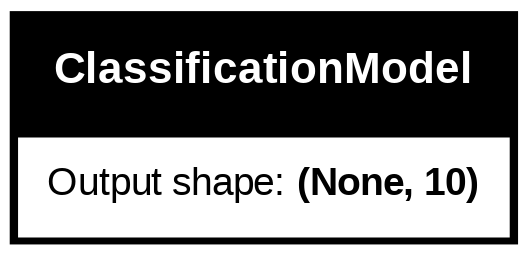

In [20]:
tf.keras.utils.plot_model(model, show_shapes=True)

Print the `accuracy`, `top_5_accuracy`, and `validation_loss` evaluation metrics.

In [21]:
for key, value in eval_logs.items():
    if isinstance(value, tf.Tensor):
        value = value.numpy()
    print(f"{key:20}: {value:.3f}")

accuracy            : 0.723
top_5_accuracy      : 0.976
validation_loss     : 1.019
steps_per_second    : 14.891


Run a batch of the processed training data through the model, and view the results

In [22]:
for images, labels in task.build_inputs(exp_config.task.train_data).take(1):
    predictions = model.predict(images)
    predictions = tf.argmax(predictions, axis=-1)

show_batch(images, labels, tf.cast(predictions, tf.int32))

if device == "CPU":
    plt.suptitle(
        "The model was only trained for a few steps, it is not expected to do well."
    )

4/4 [==============================] - 4s 6ms/step


## Export a SavedModel

In [23]:
print(predictions)

tf.Tensor(
[8 1 7 3 1 6 6 5 4 1 4 6 6 0 2 3 9 5 9 4 7 4 5 1 0 2 1 1 3 6 7 5 6 8 0 3 8
 3 7 7 4 5 3 9 7 2 9 5 0 0 5 6 8 0 1 3 9 9 3 2 6 2 8 3 4 8 0 7 1 7 4 0 3 4
 7 4 5 2 4 0 0 9 3 9 5 6 0 9 2 7 7 4 0 9 7 7 6 0 6 2 9 5 1 9 5 2 1 6 0 9 5
 4 3 5 1 3 5 0 7 4 1 8 2 6 3 1 8 6], shape=(128,), dtype=int64)


The `keras.Model` object returned by `train_lib.run_experiment` expects the data to be normalized by the dataset loader using the same mean and variance statiscics in `preprocess_ops.normalize_image(image, offset=MEAN_RGB, scale=STDDEV_RGB)`. This export function handles those details, so you can pass `tf.uint8` images and get the correct results.


In [24]:
# Saving and exporting the trained model
export_saved_model_lib.export_inference_graph(
    input_type="image_tensor",
    batch_size=1,
    input_image_size=[32, 32],
    params=exp_config,
    checkpoint_path=tf.train.latest_checkpoint(model_dir),
    export_dir="./export/",
)

Test the exported model.

In [25]:
# Importing SavedModel
imported = tf.saved_model.load("./export/")
model_fn = imported.signatures["serving_default"]

Visualize the predictions.

In [26]:
plt.figure(figsize=(10, 10))
for data in tfds.load("cifar10", split="test").batch(12).take(1):
    predictions = []
    for image in data["image"]:
        index = tf.argmax(model_fn(image[tf.newaxis, ...])["logits"], axis=1)[0]
        predictions.append(index)
    show_batch(data["image"], data["label"], predictions)

    if device == "CPU":
        plt.suptitle(
            "The model was only trained for a few steps, it is not expected to do better than random."
        )
plt.show()

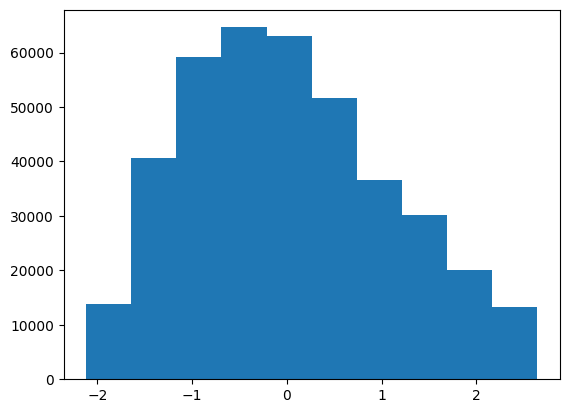

<Figure size 1000x1000 with 0 Axes>

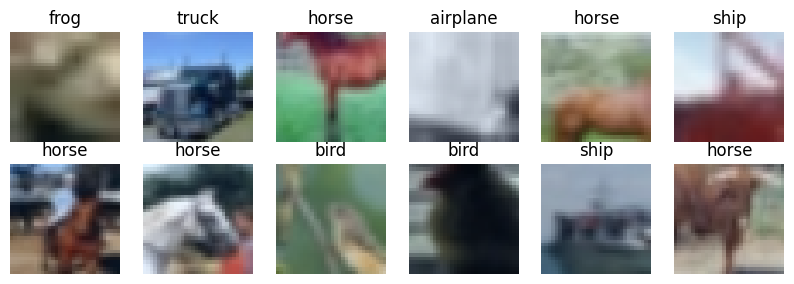

<Figure size 1000x1000 with 0 Axes>

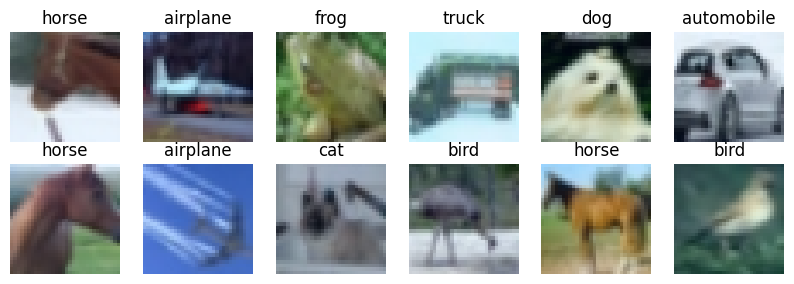

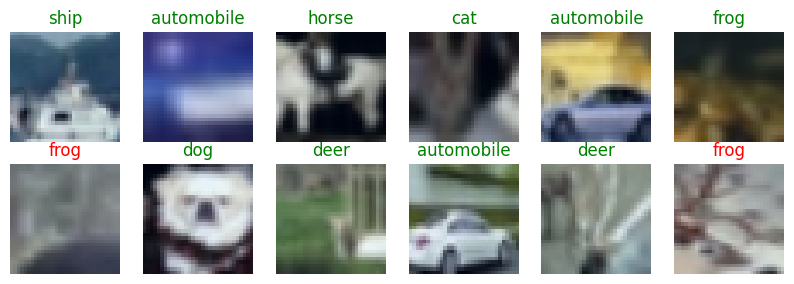

<Figure size 1000x1000 with 0 Axes>

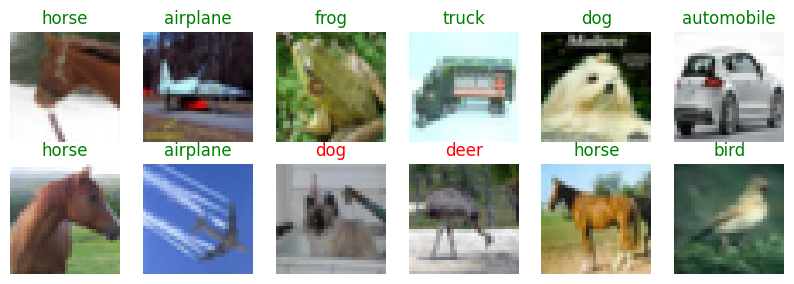

In [29]:
%matplotlib inline
from PIL import Image

model = Image.open("./model.png")
plt.show()